<a href="https://colab.research.google.com/github/nattntn/OPG-SHAPer_WebApp/blob/main/OPG_SHAPer_Age_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP

## Import data set (เรียกใช้ CSV)

In [1]:
import pandas as pd
import shutil

In [2]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## เลือกข้อมูล ทำ Background data ของ data train

In [3]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_train_Predict.csv')
dt_train

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0              0          7      F      Normal        Both   
1              1          7      F      Normal        Both   
2              2          7      F      Normal        Both   
3              3          7      F      Normal        Both   
4              4          7      F      Normal        Both   
...          ...        ...    ...         ...         ...   
4184        4184         25      M      Normal          Rt   
4185        4185         25      M      Normal          Rt   
4186        4186         25      M      Normal          Rt   
4187        4187         25      M      Normal          Rt   
4188        4188         25      M      Normal          Rt   

                                              Path_Name    Filename  Fold  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V1.jpg     2   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV1.jpg     4   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V2.jpg    10   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV2.jpg     9   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V3.jpg    10   
...                                                 ...         ...   ...   
4184  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J375.jpg     3   
4185  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J437.jpg     5   
4186  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J480.jpg     5   
4187  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J491.jpg     6   
4188  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J496.jpg     5   

      Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0                0         Female     7.107492              7.0   
1                0         Female     7.020138              7.0   
2                0         Female     6.975561              7.0   
3                0         Female     6.938187              7.0   
4                0         Female     6.916692              7.0   
...            ...            ...          ...              ...   
4184             1           Male    25.299234             25.0   
4185             1           Male    24.729193             25.0   
4186             1           Male    24.564425             25.0   
4187             1           Male    24.113144             24.0   
4188             1           Male    24.704357             25.0   

      Gender_predict Gender_predict_str  Gender_predict_int  
0           0.000003             Female                 0.0  
1           0.000025             Female                 0.0  
2           0.000808             Female                 0.0  
3           0.000107             Female                 0.0  
4           0.000014             Female                 0.0  
...              ...                ...                 ...  
4184        0.999988               Male                 1.0  
4185        0.999987               Male                 1.0  
4186        1.000000               Male                 1.0  
4187        1.000000               Male                 1.0  
4188        1.000000               Male                 1.0  

[4189 rows x 15 columns]

In [4]:
df = dt_train.drop(dt_train.columns[0], axis=1)
df

Age(year) Gender Folder_type Folder_name  \
0             7      F      Normal        Both   
1             7      F      Normal        Both   
2             7      F      Normal        Both   
3             7      F      Normal        Both   
4             7      F      Normal        Both   
...         ...    ...         ...         ...   
4184         25      M      Normal          Rt   
4185         25      M      Normal          Rt   
4186         25      M      Normal          Rt   
4187         25      M      Normal          Rt   
4188         25      M      Normal          Rt   

                                              Path_Name    Filename  Fold  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V1.jpg     2   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV1.jpg     4   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V2.jpg    10   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV2.jpg     9   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V3.jpg    10   
...                                                 ...         ...   ...   
4184  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J375.jpg     3   
4185  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J437.jpg     5   
4186  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J480.jpg     5   
4187  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J491.jpg     6   
4188  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J496.jpg     5   

      Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0                0         Female     7.107492              7.0   
1                0         Female     7.020138              7.0   
2                0         Female     6.975561              7.0   
3                0         Female     6.938187              7.0   
4                0         Female     6.916692              7.0   
...            ...            ...          ...              ...   
4184             1           Male    25.299234             25.0   
4185             1           Male    24.729193             25.0   
4186             1           Male    24.564425             25.0   
4187             1           Male    24.113144             24.0   
4188             1           Male    24.704357             25.0   

      Gender_predict Gender_predict_str  Gender_predict_int  
0           0.000003             Female                 0.0  
1           0.000025             Female                 0.0  
2           0.000808             Female                 0.0  
3           0.000107             Female                 0.0  
4           0.000014             Female                 0.0  
...              ...                ...                 ...  
4184        0.999988               Male                 1.0  
4185        0.999987               Male                 1.0  
4186        1.000000               Male                 1.0  
4187        1.000000               Male                 1.0  
4188        1.000000               Male                 1.0  

[4189 rows x 14 columns]

In [5]:
# นับรูป
# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (111, 15)
Age 8: (116, 15)
Age 9: (122, 15)
Age 10: (114, 15)
Age 11: (114, 15)
Age 12: (119, 15)
Age 13: (106, 15)
Age 14: (110, 15)
Age 15: (110, 15)
Age 16: (112, 15)
Age 17: (107, 15)
Age 18: (104, 15)
Age 19: (107, 15)
Age 20: (105, 15)
Age 21: (107, 15)
Age 22: (97, 15)
Age 23: (108, 15)
Age 24: (104, 15)
Age 25: (96, 15)
Age 7: (114, 15)
Age 8: (116, 15)
Age 9: (120, 15)
Age 10: (116, 15)
Age 11: (117, 15)
Age 12: (117, 15)
Age 13: (108, 15)
Age 14: (113, 15)
Age 15: (117, 15)
Age 16: (118, 15)
Age 17: (112, 15)
Age 18: (128, 15)
Age 19: (115, 15)
Age 20: (99, 15)
Age 21: (100, 15)
Age 22: (105, 15)
Age 23: (101, 15)
Age 24: (91, 15)
Age 25: (113, 15)


In [6]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Age(year)': dt_train['Age(year)'],
    'Gender': dt_train['Gender'],
    'Folder_type': dt_train['Folder_type'],
    'Folder_name': dt_train['Folder_name'],
    'Path_Name': dt_train['Path_Name'],
    'Filename': dt_train['Filename'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['Age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['Gender'] == 'M'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['Gender'] == 'F'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_dft = pd.concat(selected_rows)

# Now, selected_df contains 950 rows with an approximately even distribution of ages from 7 to 25
# and an equal number of "Male" and "Female" samples for each age.


In [7]:
selected_dft

Age(year) Gender Folder_type Folder_name  \
184           7      M      Normal        Both   
120           7      M      Normal        Both   
207           7      M      Normal        Both   
148           7      M      Normal        Both   
214           7      M      Normal          Lt   
...         ...    ...         ...         ...   
4050         25      F      Normal        Both   
4044         25      F      Normal        Both   
4024         25      F      Normal        Both   
4020         25      F      Normal        Both   
4003         25      F      Normal        Both   

                                              Path_Name       Filename  
184   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      VV116.jpg  
120   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV13.jpg  
207   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipVV244.jpg  
148   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV50.jpg  
214   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipVV28.jpg  
...                                                 ...            ...  
4050  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J245.jpg  
4044  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J218.jpg  
4024  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J148.jpg  
4020  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J144.jpg  
4003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipJ64.jpg  

[2660 rows x 6 columns]

In [8]:
#selected_dft.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Bg_train.csv')  # Setting index=False to avoid saving the row numbers as a column

In [9]:
# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)
Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)


## เลือกข้อมูล ทำ Background data ของ data test

In [10]:
df_test_age = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
df_test_age = df_test_age.iloc[:,1:]
print(df_test_age.shape)
df_test_age

(943, 13)


Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 13 columns]

In [11]:
df_test_age['Age_predict_int'] = df_test_age['Age_predict_int'].astype(int)
df_test_age

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
2               0         Female     7.548301                8   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
..            ...            ...          ...              ...   
938             0         Female    21.686228               22   
939             0         Female    21.118502               21   
940             0         Female    19.639433               20   
941             0         Female    21.359797               21   
942             0         Female    19.068132               19   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 13 columns]

In [12]:
# เลือกที่อายุตรงกัน
e = df_test_age[df_test_age['Age(year)'] == df_test_age['Age_predict_int']]
e

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
5            7      F      Normal        Both   
..         ...    ...         ...         ...   
921         12      M    Abnormal          Rt   
922         14      F    Abnormal          Lt   
923         14      F    Abnormal          Lt   
924         14      F    Abnormal          Rt   
931         20      M    Abnormal          Lt   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
5    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV74.jpg   
..                                                 ...           ...   
921  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      OO98.jpg   
922  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY95.jpg   
923  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY187.jpg   
924  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y100.jpg   
931  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ412.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
5               0         Female     7.095627                7   
..            ...            ...          ...              ...   
921             1           Male    12.105593               12   
922             0         Female    14.101776               14   
923             0         Female    13.616200               14   
924             0         Female    14.041607               14   
931             1           Male    19.867065               20   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
5          0.003455             Female                 0.0  
..              ...                ...                 ...  
921        0.044166             Female                 0.0  
922        0.000650             Female                 0.0  
923        0.978944               Male                 1.0  
924        0.000008             Female                 0.0  
931        0.999999               Male                 1.0  

[291 rows x 13 columns]

In [13]:
e = e.sort_values(by='Age(year)', kind='mergesort')
e

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
5            7      F      Normal        Both   
..         ...    ...         ...         ...   
760         22      M      Normal        Both   
765         22      M      Normal          Rt   
809         23      M      Normal          Rt   
880         25      F      Normal          Lt   
904         25      M      Normal        Both   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
5    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV74.jpg   
..                                                 ...           ...   
760  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU422.jpg   
765  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U292.jpg   
809  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E356.jpg   
880  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ71.jpg   
904  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ456.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
5               0         Female     7.095627                7   
..            ...            ...          ...              ...   
760             1           Male    22.010904               22   
765             1           Male    21.844440               22   
809             1           Male    22.836693               23   
880             0         Female    24.869873               25   
904             1           Male    24.887615               25   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
5          0.003455             Female                 0.0  
..              ...                ...                 ...  
760        0.999999               Male                 1.0  
765        0.999998               Male                 1.0  
809        0.999958               Male                 1.0  
880        1.000000               Male                 1.0  
904        0.999998               Male                 1.0  

[291 rows x 13 columns]

In [14]:
e['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       25])

In [15]:
selected_test = e
selected_test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
5            7      F      Normal        Both   
..         ...    ...         ...         ...   
760         22      M      Normal        Both   
765         22      M      Normal          Rt   
809         23      M      Normal          Rt   
880         25      F      Normal          Lt   
904         25      M      Normal        Both   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
5    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV74.jpg   
..                                                 ...           ...   
760  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU422.jpg   
765  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U292.jpg   
809  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E356.jpg   
880  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ71.jpg   
904  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ456.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
5               0         Female     7.095627                7   
..            ...            ...          ...              ...   
760             1           Male    22.010904               22   
765             1           Male    21.844440               22   
809             1           Male    22.836693               23   
880             0         Female    24.869873               25   
904             1           Male    24.887615               25   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
5          0.003455             Female                 0.0  
..              ...                ...                 ...  
760        0.999999               Male                 1.0  
765        0.999998               Male                 1.0  
809        0.999958               Male                 1.0  
880        1.000000               Male                 1.0  
904        0.999998               Male                 1.0  

[291 rows x 13 columns]

## Create background

In [16]:
def process_input(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_Name' column exists in the DataFrame
    if 'Path_Name' not in dt_train.columns:
        raise ValueError("The 'Path_Name' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['Path_Name'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)

    return background_data

### data train

In [17]:
import pandas as pd
import numpy as np
import torch
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [18]:
sdf_train = selected_dft.sort_values(by='Age(year)', kind='mergesort')
sdf_train

Age(year) Gender Folder_type Folder_name  \
184           7      M      Normal        Both   
120           7      M      Normal        Both   
207           7      M      Normal        Both   
148           7      M      Normal        Both   
214           7      M      Normal          Lt   
...         ...    ...         ...         ...   
4050         25      F      Normal        Both   
4044         25      F      Normal        Both   
4024         25      F      Normal        Both   
4020         25      F      Normal        Both   
4003         25      F      Normal        Both   

                                              Path_Name       Filename  
184   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      VV116.jpg  
120   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV13.jpg  
207   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipVV244.jpg  
148   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV50.jpg  
214   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipVV28.jpg  
...                                                 ...            ...  
4050  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J245.jpg  
4044  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J218.jpg  
4024  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J148.jpg  
4020  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J144.jpg  
4003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipJ64.jpg  

[2660 rows x 6 columns]

In [19]:
sdf_train['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [20]:
background_train = process_input(sdf_train)

Processing image 1/2660
Processing image 2/2660
Processing image 3/2660
Processing image 4/2660
Processing image 5/2660
Processing image 6/2660
Processing image 7/2660
Processing image 8/2660
Processing image 9/2660
Processing image 10/2660
Processing image 11/2660
Processing image 12/2660
Processing image 13/2660
Processing image 14/2660
Processing image 15/2660
Processing image 16/2660
Processing image 17/2660
Processing image 18/2660
Processing image 19/2660
Processing image 20/2660
Processing image 21/2660
Processing image 22/2660
Processing image 23/2660
Processing image 24/2660
Processing image 25/2660
Processing image 26/2660
Processing image 27/2660
Processing image 28/2660
Processing image 29/2660
Processing image 30/2660
Processing image 31/2660
Processing image 32/2660
Processing image 33/2660
Processing image 34/2660
Processing image 35/2660
Processing image 36/2660
Processing image 37/2660
Processing image 38/2660
Processing image 39/2660
Processing image 40/2660
Processin

### data test

In [21]:
print(selected_test.shape)
selected_test.head()

(291, 13)


Age(year) Gender Folder_type Folder_name  \
0          7      F      Normal        Both   
1          7      F      Normal        Both   
3          7      F      Normal        Both   
4          7      F      Normal        Both   
5          7      F      Normal        Both   

                                           Path_Name     Filename  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
5  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV74.jpg   

   Gender_Class Gender_Predict  Age_predict  Age_predict_int  Gender_predict  \
0             0         Female     7.423399                7        0.005142   
1             0         Female     7.415316                7        0.046188   
3             0         Female     7.492433                7        0.000020   
4             0         Female     7.343049                7        0.020910   
5             0         Female     7.095627                7        0.003455   

  Gender_predict_str  Gender_predict_int  
0             Female                 0.0  
1             Female                 0.0  
3             Female                 0.0  
4             Female                 0.0  
5             Female                 0.0

In [22]:
sdf_test = selected_test.sort_values(by='Age(year)', kind='mergesort')
sdf_test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
5            7      F      Normal        Both   
..         ...    ...         ...         ...   
760         22      M      Normal        Both   
765         22      M      Normal          Rt   
809         23      M      Normal          Rt   
880         25      F      Normal          Lt   
904         25      M      Normal        Both   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
5    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV74.jpg   
..                                                 ...           ...   
760  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU422.jpg   
765  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U292.jpg   
809  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E356.jpg   
880  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ71.jpg   
904  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ456.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
5               0         Female     7.095627                7   
..            ...            ...          ...              ...   
760             1           Male    22.010904               22   
765             1           Male    21.844440               22   
809             1           Male    22.836693               23   
880             0         Female    24.869873               25   
904             1           Male    24.887615               25   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
5          0.003455             Female                 0.0  
..              ...                ...                 ...  
760        0.999999               Male                 1.0  
765        0.999998               Male                 1.0  
809        0.999958               Male                 1.0  
880        1.000000               Male                 1.0  
904        0.999998               Male                 1.0  

[291 rows x 13 columns]

In [23]:
sdf_test = sdf_test.reset_index().iloc[:,1:]

In [24]:
sdf_test['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       25])

In [25]:
background_test = process_input(sdf_test)

Processing image 1/291
Processing image 2/291
Processing image 3/291
Processing image 4/291
Processing image 5/291
Processing image 6/291
Processing image 7/291
Processing image 8/291
Processing image 9/291
Processing image 10/291
Processing image 11/291
Processing image 12/291
Processing image 13/291
Processing image 14/291
Processing image 15/291
Processing image 16/291
Processing image 17/291
Processing image 18/291
Processing image 19/291
Processing image 20/291
Processing image 21/291
Processing image 22/291
Processing image 23/291
Processing image 24/291
Processing image 25/291
Processing image 26/291
Processing image 27/291
Processing image 28/291
Processing image 29/291
Processing image 30/291
Processing image 31/291
Processing image 32/291
Processing image 33/291
Processing image 34/291
Processing image 35/291
Processing image 36/291
Processing image 37/291
Processing image 38/291
Processing image 39/291
Processing image 40/291
Processing image 41/291
Processing image 42/291
P

In [26]:
print(type(background_test))

<class 'list'>


##**แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [27]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [28]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

2660
(2660, 224, 224, 3)
(291, 224, 224, 3)


# คำนวณ SHAP Values

## load model

### Import

In [29]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

### กำหนดค่าพารามิเตอร์ (ตามที่กำหนดใน Model)


In [30]:
batch_size = 16
width = 224
height = 224
epochs = 250 # รอบในการเทรน
dropout_rate = 0.2
input_shape = (height, width, 3)

### Clone Efficient

In [31]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


### Load Model

In [32]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [33]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [34]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [35]:
# Check the number of output units in the final layer
num_output_units = model.layers[-1].output_shape[-1]

# Check if it's a binary classification model (2 output units) or not
if num_output_units == 2:
    print("This is a binary classification model.")
else:
    print("This is not a binary classification model.")

This is not a binary classification model.


## SHAP & YOLO

### SHAP

In [36]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.0 MB/s eta 0:00:00


In [37]:
import shap

In [38]:
print(background_test_array.shape)
print(background_test_array[[10]].shape) # ภาพที่ 10

(291, 224, 224, 3)
(1, 224, 224, 3)


In [39]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [40]:
model.output_names[0] # age estimation

'prediction_layer'

In [41]:
model.output_names[1] # gender prediction

'prediction_layer2'

เลือกเฉพาะ Output layer ไปทำการหาความสำคัญ

In [42]:
import shap
import tensorflow as tf

# Create separate models for each output you want to explain
#AGE
model_layer1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer').output)
#Gender
model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)


In [43]:
# Define your explainer for the first output layer (prediction_layer)
#AGE
explainer_layer1 = shap.GradientExplainer(model_layer1, background_train_array)

In [44]:
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

### yolo

In [45]:
# load YOLO ที่Train มา
# Replace with code to load your trained YOLO model
weights_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/papers/gpt/Yolo_v5/best.pt'

# Load YOLOv5 model from Google Drive
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 146.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 16.0s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-7 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


#### ทํา non maximum suppression

In [46]:
# import pandas as pd

# def compute_iou(boxA, boxB):
#     # Determine the coordinates of the intersection rectangle
#     xA = max(boxA[0], boxB[0])
#     yA = max(boxA[1], boxB[1])
#     xB = min(boxA[2], boxB[2])
#     yB = min(boxA[3], boxB[3])

#     # Compute the area of intersection
#     interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

#     # Compute the area of both the prediction and ground-truth rectangles
#     boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
#     boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

#     # Compute the intersection over union by taking the intersection
#     # area and dividing it by the sum of prediction + ground-truth
#     # areas - the interesection area
#     iou = interArea / float(boxAArea + boxBArea - interArea)

#     return iou

# def nms_per_class(df, iou_threshold=0.5):
#     # Initialize an empty DataFrame to store NMS results
#     df_nms = pd.DataFrame()

#     # Get unique class IDs
#     class_ids = df['class'].unique()

#     for class_id in class_ids:
#         # Filter detections by class
#         df_class = df[df['class'] == class_id].copy()

#         # Apply NMS
#         df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
#         suppressed_indices = set()

#         for i in range(len(df_class_sorted)):
#             if i in suppressed_indices:
#                 continue

#             for j in range(i+1, len(df_class_sorted)):
#                 if j in suppressed_indices:
#                     continue

#                 boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']]
#                 boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']]

#                 if compute_iou(boxA, boxB) > iou_threshold:
#                     suppressed_indices.add(j)

#         # Filter out suppressed detections
#         df_nms_class = df_class_sorted.drop(index=list(suppressed_indices)).reset_index(drop=True)

#         # Append results for this class to the main DataFrame
#         df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

#     return df_nms

In [47]:
import pandas as pd

def compute_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # Compute the intersection over union (IoU)
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.5):
    # Initialize an empty DataFrame to store NMS results and IoU values
    df_nms = pd.DataFrame()

    # Get unique class IDs
    class_ids = df['class'].unique()

    for class_id in class_ids:
        # Filter detections by class
        df_class = df[df['class'] == class_id].copy()

        # Apply NMS
        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        retained_indices = []
        iou_values = []

        # Collect IoU values and determine retained detections
        for i in range(len(df_class_sorted)):
            if i in retained_indices:
                continue

            retained_indices.append(i)
            iou_values.append(1.0)  # Default IoU value, replace with actual value

            for j in range(i + 1, len(df_class_sorted)):
                if j in retained_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']]
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']]
                iou_value = compute_iou(boxA, boxB)

                if iou_value > iou_threshold:
                    retained_indices.append(j)
                    iou_values.append(iou_value)

        # Filter out suppressed detections based on retained indices
        df_nms_class = df_class_sorted.iloc[retained_indices].reset_index(drop=True)

        # Add IoU values as a new column to the DataFrame
        df_nms_class['iou'] = iou_values

        # Append results for this class to the main DataFrame
        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms


#### def map box ที่ detectกับ SHAP value

##### pos img

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_pos(image_path, df, grayscale_image, output_path):
    selected_bboxes = []  #สร้าง list ว่าง มาเก็บกล่องที่มีค่า SHAP เกิน IoU ที่ 0.1
    # value_than_IoU = []

    # Load the original image
    img = Image.open(image_path) #  เปิดภาพจาก path
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency // plot จากสีเทา ให้เป้นน สีแดง ทับลงไป
    ax.imshow(grayscale_image, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():  #df ที่ตัวแบบทนายมาทั้งหมด  จะทำการ loop เก็บค่าตห.จากตาราง
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name,IoU = row['confidence'], row['class'],row['name'],row['iou']

        # Convert coordinates to absolute values // เปลี่ยนจากตห.ของกล่อง ให้ตามขนาดภาพที่ใส่เข้าไป (ม้้ง)
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image //คำนวณบริเวณที่สินใจ
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1]) # แปลงพิกัดกรอบสีเหลี่ยมให้เข้ากับขนาดรูปภาพ โดย *พิกัด กับขนาดของ grayscale_image
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax] # เลือก roi บริเวณที่สนใจ  จากgrayscale_image โดยตัด roi ออกมาเป็น nparray

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1]) #Calculate the percentage ของ pixels ที่ไม่เป็น 0 แล้วหารด้วย pixels ทั้งหมด

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name, 'iou':IoU})
            # value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch //สร้างกล่อง
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin), #abs แปลงเป็นพิกัดในหน่วย  pixel ให้ตรงกับขนาดภาพจริง
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='r', # เปลี่ยนสีกล่อง
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}' # ข้อความที่จะ Plot บนกล่อง
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5)) # ตห + สีของตัวอักษร ขนาด front
    # Save the figure
    plt.savefig(output_path, bbox_inches='tight')

    # Show the plot
    plt.show()

    return selected_bboxes#, value_than_IoU

##### neg img

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_neg(image_path, df, grayscale_image, output_path):
    selected_bboxes = []
    # value_than_IoU = []

    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency
    ax.imshow(grayscale_image, cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name,IoU = row['confidence'], row['class'],row['name'],row['iou']

        # Convert coordinates to absolute values
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1])
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax]

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1])

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box#เลือกกล่องที่มีค่า shap ในกล่องมากกว่า 10% ของทั้งหมด
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name, 'iou':IoU})
            # value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin),
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='b',
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}'
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
   # Save the figure
    plt.savefig(output_path, bbox_inches='tight')

    # Show the plot
    plt.show()

    return selected_bboxes#, value_than_IoU

# หลายภาพ

In [50]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [51]:
sdf_test[['Path_Name']]

Path_Name
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
..                                                 ...
286  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
287  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
288  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
289  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
290  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...

[291 rows x 1 columns]

In [52]:
file_paths = pd.Series([
    '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg',
    '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg',
    '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg',
    '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg',
    '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV74.jpg'
])

In [53]:
# Iterate over each file path in the Series
for index, file_path in file_paths.items():
    print(f"Processing image {index}: {file_path}")

Processing image 0: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg
Processing image 1: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg
Processing image 2: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg
Processing image 3: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg
Processing image 4: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV74.jpg


Processing image 0: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg


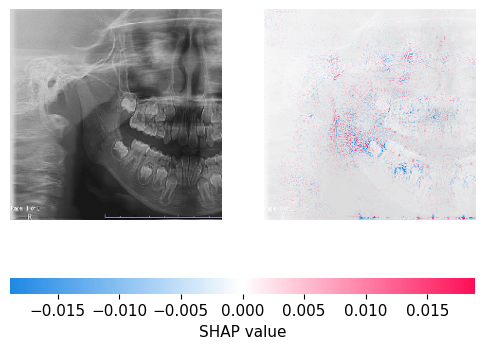

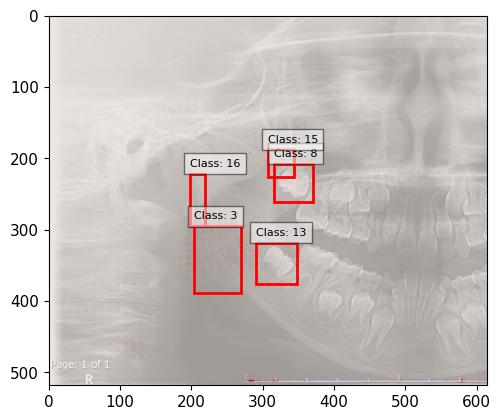

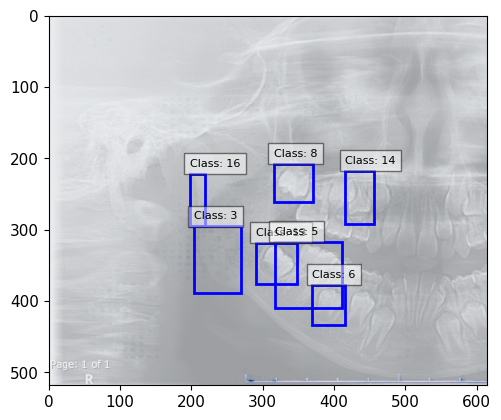

Processing image 1: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg


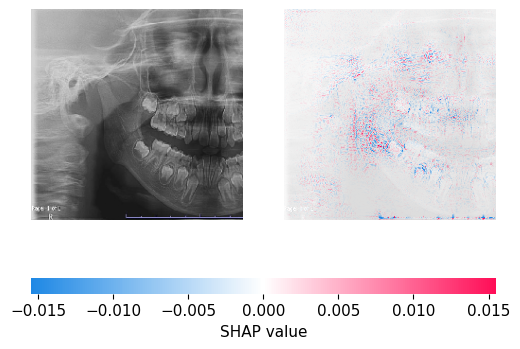

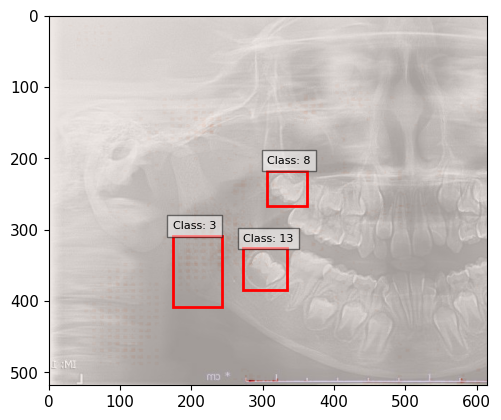

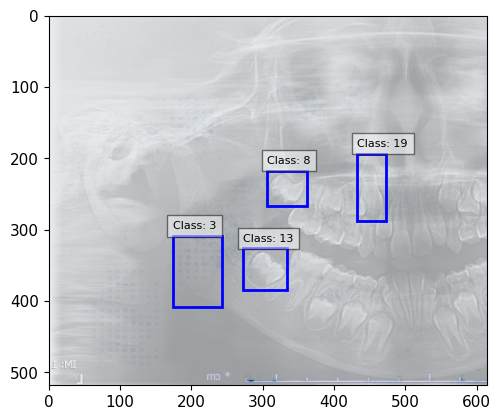

Processing image 2: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg


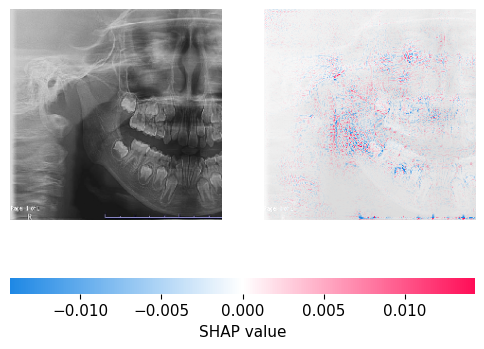

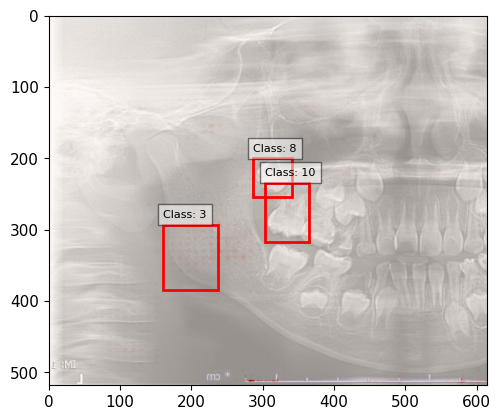

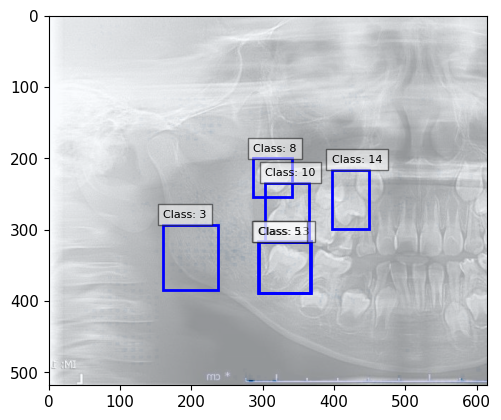

Processing image 3: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg


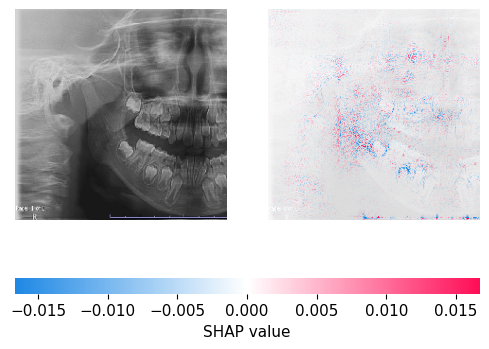

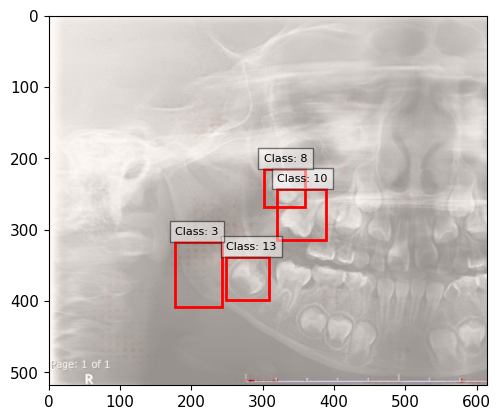

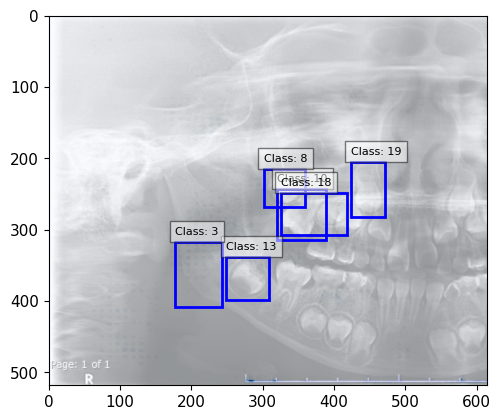

Processing image 4: /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV74.jpg


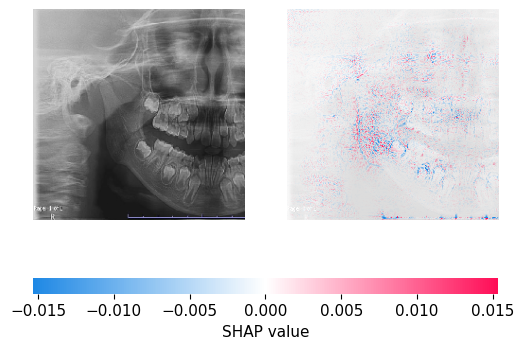

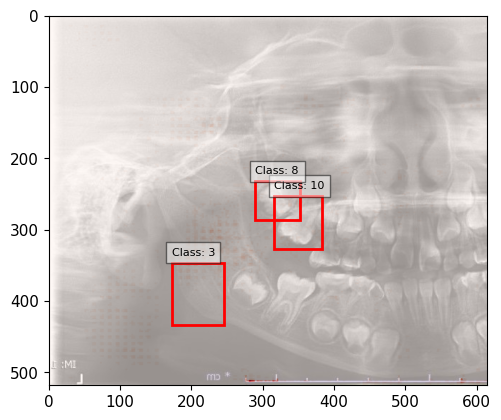

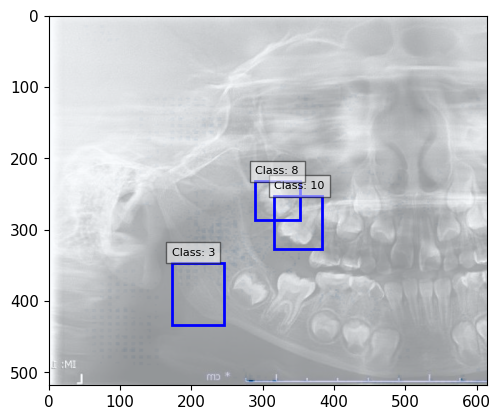

In [65]:
# Iterate over each file path in the Series
dataframe_neg = []
dataframe_pos = []
list_neg = []
list_pos = []

for index, file_path in file_paths.items():
    filename = file_path.split("/")[-1]
    print(f"Processing image {index}: {file_path}")

    try:
        # Load the image
        image = Image.open(file_path)

        # Perform your existing image processing steps
        results = yolo_model(image)  # Assuming yolo_model is defined
        df = results.pandas().xyxyn[0]  # Assuming results has a pandas method
        df_filtered_nms = nms_per_class(df, iou_threshold=0.5)  # Assuming nms_per_class is defined
        shap_values = explainer_layer1.shap_values(background_test_array[[0]])  # Assuming explainer_layer1 and background_test_array are defined

        # Processing for SHAP values
        data = [np.array(shap_values)]
        image_array = data[0]
        positive = np.where(image_array >= 0, image_array, 0)
        negative = np.where(image_array < 0, image_array, 0)
        negative_aps = np.abs(negative)

        flattened_array_pos = positive.flatten()
        flattened_array_neg = negative_aps.flatten()

        normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
        normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

        normalized_positive = normalized_array_pos.reshape(positive.shape)
        normalized_neg = normalized_array_neg.reshape(negative_aps.shape)

        grayscale_image_pos = normalized_positive / 3.0
        grayscale_image_neg = normalized_neg / 3.0

        grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
        grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

        grayscale_image_positive = grayscale_image_positive.squeeze()
        grayscale_image_negative = grayscale_image_negative.squeeze()

        percentile_95_pos = np.percentile(grayscale_image_positive, 95)
        percentile_95_neg = np.percentile(grayscale_image_negative, 95)

        grayscale_pos_thresholded = grayscale_image_positive
        grayscale_neg_thresholded = grayscale_image_negative

        grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0
        grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0
        # Example: Display or save processed results
        %matplotlib inline
        shap.image_plot(shap_values, background_test_array[[0]])

        # Assuming plot_bboxes_on_image_pos and plot_bboxes_on_image_neg are defined
        selected_bboxes_pos = plot_bboxes_on_image_pos(file_path, df_filtered_nms, grayscale_pos_thresholded, f"/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Images/pos_image_{filename}")

        # # Save the figure
        # image_path = f"/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/OPG-SHAPer/Images/pos_image_{filename}.png"
        # plt.savefig(image_path, bbox_inches='tight')

        dataframe_pos.append(pd.DataFrame(selected_bboxes_pos)) # เก็บค่า ทำเป็น dataframe ก่อน
        list_pos.append(selected_bboxes_pos) # เก็บค่า list
        # print(type(selected_bboxes_pos))

        selected_bboxes_neg = plot_bboxes_on_image_neg(file_path, df_filtered_nms, grayscale_neg_thresholded, f"/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Images/neg_image_{filename}")
        dataframe_neg.append(pd.DataFrame(selected_bboxes_neg))
        list_neg.append(selected_bboxes_neg)

    except Exception as e:
        print(f"Error processing image {index}: {file_path}")
        print(e)


In [69]:
dataframe_neg

[         xmin        ymin        xmax        ymax  confidence  class  \
 0  290.441043  318.575748  347.501520  375.691668    0.949560     13   
 1  317.049788  316.729349  411.156767  409.009905    0.944441      5   
 2  315.235370  207.320941  369.728971  261.244226    0.928218      8   
 3  369.278275  377.189208  415.869944  432.946866    0.921958      6   
 4  203.511005  295.167556  268.920413  389.243506    0.901955      3   
 5  415.481574  217.678554  455.198303  291.415601    0.888440     14   
 6  197.709316  221.778303  218.693832  295.307760    0.808702     16   
 
                         name  iou  
 0         Lower Second Molar  1.0  
 1          Lower First Molar  1.0  
 2         Upper Second Molar  1.0  
 3      Lower Second Premolar  1.0  
 4           Mandibular angle  1.0  
 5       Upper First Premolar  1.0  
 6  Posterior border of Ramus  1.0  ,
          xmin        ymin        xmax        ymax  confidence  class  \
 0  272.698786  326.283959  334.644905  384.

In [68]:
dataframe_neg[0]

xmin        ymin        xmax        ymax  confidence  class  \
0  290.441043  318.575748  347.501520  375.691668    0.949560     13   
1  317.049788  316.729349  411.156767  409.009905    0.944441      5   
2  315.235370  207.320941  369.728971  261.244226    0.928218      8   
3  369.278275  377.189208  415.869944  432.946866    0.921958      6   
4  203.511005  295.167556  268.920413  389.243506    0.901955      3   
5  415.481574  217.678554  455.198303  291.415601    0.888440     14   
6  197.709316  221.778303  218.693832  295.307760    0.808702     16   

                        name  iou  
0         Lower Second Molar  1.0  
1          Lower First Molar  1.0  
2         Upper Second Molar  1.0  
3      Lower Second Premolar  1.0  
4           Mandibular angle  1.0  
5       Upper First Premolar  1.0  
6  Posterior border of Ramus  1.0

In [70]:
dataframe_pos

[         xmin        ymin        xmax        ymax  confidence  class  \
 0  290.441043  318.575748  347.501520  375.691668    0.949560     13   
 1  315.235370  207.320941  369.728971  261.244226    0.928218      8   
 2  203.511005  295.167556  268.920413  389.243506    0.901955      3   
 3  197.709316  221.778303  218.693832  295.307760    0.808702     16   
 4  306.678292  187.373783  344.053693  226.209373    0.784082     15   
 
                         name  iou  
 0         Lower Second Molar  1.0  
 1         Upper Second Molar  1.0  
 2           Mandibular angle  1.0  
 3  Posterior border of Ramus  1.0  
 4          Upper Third Molar  1.0  ,
          xmin        ymin        xmax        ymax  confidence  class  \
 0  272.698786  326.283959  334.644905  384.783243    0.948097     13   
 1  306.334113  217.378926  362.162306  267.184029    0.918788      8   
 2  173.991753  308.951112  242.764686  407.734420    0.896737      3   
 
                  name  iou  
 0  Lower Sec

In [71]:
list_neg

[[{'xmin': 290.4410427212715,
   'ymin': 318.5757477283478,
   'xmax': 347.5015199184418,
   'ymax': 375.6916677951813,
   'confidence': 0.9495601058006287,
   'class': 13,
   'name': 'Lower Second Molar',
   'iou': 1.0},
  {'xmin': 317.04978835582733,
   'ymin': 316.7293486595154,
   'xmax': 411.1567670106888,
   'ymax': 409.00990533828735,
   'confidence': 0.944441020488739,
   'class': 5,
   'name': 'Lower First Molar',
   'iou': 1.0},
  {'xmin': 315.2353698015213,
   'ymin': 207.32094126939774,
   'xmax': 369.7289706468582,
   'ymax': 261.2442260980606,
   'confidence': 0.9282175898551941,
   'class': 8,
   'name': 'Upper Second Molar',
   'iou': 1.0},
  {'xmin': 369.27827548980713,
   'ymin': 377.1892079114914,
   'xmax': 415.8699440956116,
   'ymax': 432.94686591625214,
   'confidence': 0.9219583868980408,
   'class': 6,
   'name': 'Lower Second Premolar',
   'iou': 1.0},
  {'xmin': 203.51100474596024,
   'ymin': 295.1675559282303,
   'xmax': 268.92041301727295,
   'ymax': 389.24

In [72]:
list_pos

[[{'xmin': 290.4410427212715,
   'ymin': 318.5757477283478,
   'xmax': 347.5015199184418,
   'ymax': 375.6916677951813,
   'confidence': 0.9495601058006287,
   'class': 13,
   'name': 'Lower Second Molar',
   'iou': 1.0},
  {'xmin': 315.2353698015213,
   'ymin': 207.32094126939774,
   'xmax': 369.7289706468582,
   'ymax': 261.2442260980606,
   'confidence': 0.9282175898551941,
   'class': 8,
   'name': 'Upper Second Molar',
   'iou': 1.0},
  {'xmin': 203.51100474596024,
   'ymin': 295.1675559282303,
   'xmax': 268.92041301727295,
   'ymax': 389.24350583553314,
   'confidence': 0.9019549489021301,
   'class': 3,
   'name': 'Mandibular angle',
   'iou': 1.0},
  {'xmin': 197.70931559801102,
   'ymin': 221.77830278873444,
   'xmax': 218.69383215904236,
   'ymax': 295.30776023864746,
   'confidence': 0.8087021112442017,
   'class': 16,
   'name': 'Posterior border of Ramus',
   'iou': 1.0},
  {'xmin': 306.6782918572426,
   'ymin': 187.3737828731537,
   'xmax': 344.053692817688,
   'ymax': 2

In [73]:
type(selected_bboxes_neg)

list

In [75]:
name_count_pos = {}

# Iterate over each list of dictionaries
for sublist in list_pos:
    # Iterate over each dictionary in the sublist
    for item in sublist:
        # Get the name value from the dictionary
        name = item['name']
        # Update the count for the name in the dictionary
        if name in name_count_pos:
            name_count_pos[name] += 1
        else:
            name_count_pos[name] = 1

# Print the name counts
for name, count in name_count_pos.items():
    print(f"{name}: {count}/{len(list_pos)}")

Lower Second Molar: 3/5
Upper Second Molar: 5/5
Mandibular angle: 5/5
Posterior border of Ramus: 1/5
Upper Third Molar: 1/5
Upper First Molar: 3/5


In [76]:
name_count_neg = {}

# Iterate over each list of dictionaries
for sublist in list_neg:
    # Iterate over each dictionary in the sublist
    for item in sublist:
        # Get the name value from the dictionary
        name = item['name']
        # Update the count for the name in the dictionary
        if name in name_count_neg:
            name_count_neg[name] += 1
        else:
            name_count_neg[name] = 1

# Print the name counts
for name, count in name_count_neg.items():
    print(f"{name}: {count}/{len(list_neg)}")

Lower Second Molar: 4/5
Lower First Molar: 2/5
Upper Second Molar: 5/5
Lower Second Premolar: 1/5
Mandibular angle: 5/5
Upper First Premolar: 2/5
Posterior border of Ramus: 1/5
Upper Canine: 2/5
Upper First Molar: 3/5
Upper Second Premolar: 1/5


### 7 Year

#### เลือกรูปที่ต้องการหาค่า SHAP Value

In [49]:
sdf_test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
286         22      M      Normal        Both   
287         22      M      Normal          Rt   
288         23      M      Normal          Rt   
289         25      F      Normal          Lt   
290         25      M      Normal        Both   

                                             Path_Name  ... Age_predict  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...    7.423399   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...    7.415316   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...    7.492433   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...    7.343049   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...    7.095627   
..                                                 ...  ...         ...   
286  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...   22.010904   
287  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...   21.844440   
288  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...   22.836693   
289  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...   24.869873   
290  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  ...   24.887615   

     Age_predict_int Gender_predict  Gender_predict_str  Gender_predict_int  
0                  7       0.005142              Female                 0.0  
1                  7       0.046188              Female                 0.0  
2                  7       0.000020              Female                 0.0  
3                  7       0.020910              Female                 0.0  
4                  7       0.003455              Female                 0.0  
..               ...            ...                 ...                 ...  
286               22       0.999999                Male                 1.0  
287               22       0.999998                Male                 1.0  
288               23       0.999958                Male                 1.0  
289               25       1.000000                Male                 1.0  
290               25       0.999998                Male                 1.0  

[291 rows x 13 columns]

In [50]:
from PIL import Image
Image_V69_7Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg')
Image_V69_7Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg'

Image_FlipV69_7Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg')
Image_FlipV69_7Y_F
Image_FlipV69_7Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg'

Image_FlipV70_7Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg')
Image_FlipV70_7Y_F
Image_FlipV70_7Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg'

Image_VV85_7Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/M/Both/VV85.jpg')
Image_VV85_7Y_M
Image_VV85_7Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/M/Both/VV85.jpg'

Image_FlipVV85_7Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/M/Both/FlipVV85.jpg')
Image_FlipVV85_7Y_M
Image_FlipVV85_7Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/M/Both/FlipVV85.jpg'

In [ ]:
sdf_test.reset_index().iloc[0]

index                                                                 0
Age(year)                                                             7
Gender                                                                F
Folder_type                                                      Normal
Folder_name                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
Filename                                                        V69.jpg
Gender_Class                                                          0
Gender_Predict                                                   Female
Age_predict                                                    7.423399
Age_predict_int                                                       7
Gender_predict                                                 0.005142
Gender_predict_str                                               Female
Gender_predict_int                                              

In [ ]:
sdf_test.reset_index().iloc[1]

index                                                                 1
Age(year)                                                             7
Gender                                                                F
Folder_type                                                      Normal
Folder_name                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
Filename                                                    FlipV69.jpg
Gender_Class                                                          0
Gender_Predict                                                   Female
Age_predict                                                    7.415316
Age_predict_int                                                       7
Gender_predict                                                 0.046188
Gender_predict_str                                               Female
Gender_predict_int                                              

In [ ]:
sdf_test.reset_index().iloc[2] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                 2
Age(year)                                                             7
Gender                                                                F
Folder_type                                                      Normal
Folder_name                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
Filename                                                    FlipV70.jpg
Gender_Class                                                          0
Gender_Predict                                                   Female
Age_predict                                                    7.492433
Age_predict_int                                                       7
Gender_predict                                                  0.00002
Gender_predict_str                                               Female
Gender_predict_int                                              

In [ ]:
sdf_test.reset_index().iloc[18] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                18
Age(year)                                                             7
Gender                                                                M
Folder_type                                                      Normal
Folder_name                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
Filename                                                       VV85.jpg
Gender_Class                                                          1
Gender_Predict                                                     Male
Age_predict                                                     7.47642
Age_predict_int                                                       7
Gender_predict                                                 0.987605
Gender_predict_str                                                 Male
Gender_predict_int                                              

In [ ]:
sdf_test.reset_index().iloc[19] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                19
Age(year)                                                             7
Gender                                                                M
Folder_type                                                      Normal
Folder_name                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
Filename                                                   FlipVV85.jpg
Gender_Class                                                          1
Gender_Predict                                                     Male
Age_predict                                                    7.107091
Age_predict_int                                                       7
Gender_predict                                                 0.988593
Gender_predict_str                                                 Male
Gender_predict_int                                              

#### YOLO (detect ตห)

In [51]:
# YOLO detect ตำแหน่ง
#ภาพ1
results_V69_7Y_F = yolo_model(Image_V69_7Y_F) # results = ผลจากการทำนาย
df_V69_7Y_F = results_V69_7Y_F.pandas().xyxyn[0] #.pandas ทำให้เป็น dataframe // .xyxy ตห.กล่อง ///  n normalization ค่าให้มีค่าอยู่ระหว่าง 0-1 //[0]= index
#ภาพ2
results_FlipV69_7Y_F = yolo_model(Image_FlipV69_7Y_F)
df_FlipV69_7Y_F = results_FlipV69_7Y_F.pandas().xyxyn[0]
#ภาพ3
results_FlipV70_7Y_F = yolo_model(Image_FlipV70_7Y_F)
df_FlipV70_7Y_F = results_FlipV70_7Y_F.pandas().xyxyn[0]
#ภาพ4
results_VV85_7Y_M = yolo_model(Image_VV85_7Y_M)
df_VV85_7Y_M = results_VV85_7Y_M.pandas().xyxyn[0]
#ภาพ5
results_FlipVV85_7Y_M = yolo_model(Image_FlipVV85_7Y_M)
df_FlipVV85_7Y_M= results_FlipVV85_7Y_M.pandas().xyxyn[0]

WARNING ⚠️ NMS time limit 0.550s exceeded


In [52]:
results_V69_7Y_F

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 518x614 1 Condyle, 1 Upper Lateral Incisor, 1 Lower Lateral Incisor, 1 Mandibular angle, 2 Lower Central Incisors, 1 Lower First Molar, 1 Lower Second Premolar, 1 Nasal, 1 Upper Second Molar, 1 Lower Canine, 1 Upper First Molar, 1 Lower First Premolar, 1 Lower Second Molar, 1 Upper First Premolar, 1 Upper Third Molar, 1 Posterior border of Ramus, 1 Upper Central Incisor, 1 Upper Second Premolar, 1 Upper Canine
Speed: 41.3ms pre-process, 109.5ms inference, 717.0ms NMS per image at shape (1, 3, 544, 640)

In [53]:
results_FlipV69_7Y_F

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 518x614 1 Condyle, 1 Upper Lateral Incisor, 1 Lower Lateral Incisor, 1 Mandibular angle, 1 Lower Central Incisor, 1 Lower First Molar, 1 Lower Second Premolar, 1 Nasal, 1 Upper Second Molar, 1 Lower Canine, 1 Upper First Molar, 1 Lower First Premolar, 1 Lower Second Molar, 1 Upper First Premolar, 1 Posterior border of Ramus, 2 Upper Central Incisors, 3 Upper Second Premolars, 1 Upper Canine
Speed: 8.3ms pre-process, 6.9ms inference, 5.8ms NMS per image at shape (1, 3, 544, 640)

In [54]:
results_FlipVV85_7Y_M

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 518x614 1 Condyle, 1 Upper Lateral Incisor, 1 Lower Lateral Incisor, 1 Mandibular angle, 1 Lower Central Incisor, 1 Lower First Molar, 1 Lower Second Premolar, 1 Nasal, 1 Upper Second Molar, 1 Lower Canine, 1 Upper First Molar, 1 Lower First Premolar, 1 Lower Second Molar, 2 Upper First Premolars, 1 Upper Third Molar, 1 Posterior border of Ramus, 1 Upper Central Incisor, 2 Upper Second Premolars, 1 Upper Canine
Speed: 5.4ms pre-process, 6.2ms inference, 6.2ms NMS per image at shape (1, 3, 544, 640)

##### NMS

In [55]:
df_V69_7Y_F_filtered_nms = nms_per_class(df_V69_7Y_F,iou_threshold=0.5)
df_FlipV69_7Y_F_filtered_nms = nms_per_class(df_FlipV69_7Y_F,iou_threshold=0.5)
df_FlipV70_7Y_F_filtered_nms = nms_per_class(df_FlipV70_7Y_F,iou_threshold=0.5)
df_VV85_7Y_M_filtered_nms = nms_per_class(df_VV85_7Y_M,iou_threshold=0.5)
df_FlipVV85_7Y_M_filtered_nms = nms_per_class(df_FlipVV85_7Y_M,iou_threshold=0.5)

In [57]:
df_V69_7Y_F_filtered_nms

xmin      ymin      xmax      ymax  confidence  class  \
0   0.473031  0.615011  0.565963  0.725273    0.949560     13   
1   0.516368  0.611447  0.669636  0.789594    0.944441      5   
2   0.763511  0.055511  0.929887  0.432768    0.935649      7   
3   0.513413  0.400233  0.602164  0.504332    0.928218      8   
4   0.631682  0.407176  0.706163  0.533568    0.923084     18   
5   0.601430  0.728165  0.677313  0.835805    0.921959      6   
6   0.667729  0.733540  0.750514  0.869000    0.918067     12   
7   0.558074  0.430709  0.648889  0.587324    0.916236     10   
8   0.720266  0.367530  0.784213  0.536205    0.903446     19   
9   0.331451  0.569822  0.437981  0.751435    0.901955      3   
10  0.788729  0.451238  0.843186  0.658661    0.900649     17   
11  0.676680  0.420229  0.741365  0.562578    0.888440     14   
12  0.754468  0.443020  0.820601  0.632473    0.876810      1   
13  0.304413  0.331172  0.390804  0.434044    0.870339      0   
14  0.706533  0.778543  0.796028  0.935024    0.863187      9   
15  0.806892  0.683589  0.849348  0.863262    0.832469      4   
16  0.775855  0.694715  0.829652  0.861912    0.436831      4   
17  0.322002  0.428144  0.356179  0.570092    0.808703     16   
18  0.499476  0.361725  0.560348  0.436698    0.784083     15   
19  0.774232  0.696849  0.819695  0.857928    0.773757      2   

                         name       iou  
0          Lower Second Molar  1.000000  
1           Lower First Molar  1.000000  
2                       Nasal  1.000000  
3          Upper Second Molar  1.000000  
4       Upper Second Premolar  1.000000  
5       Lower Second Premolar  1.000000  
6        Lower First Premolar  1.000000  
7           Upper First Molar  1.000000  
8                Upper Canine  1.000000  
9            Mandibular angle  1.000000  
10      Upper Central Incisor  1.000000  
11       Upper First Premolar  1.000000  
12      Upper Lateral Incisor  1.000000  
13                    Condyle  1.000000  
14               Lower Canine  1.000000  
15      Lower Central Incisor  1.000000  
16      Lower Central Incisor  0.942953  
17  Posterior border of Ramus  1.000000  
18          Upper Third Molar  1.000000  
19      Lower Lateral Incisor  1.000000

In [58]:
df_FlipV70_7Y_F_filtered_nms

xmin      ymin      xmax      ymax  confidence  class  \
0   0.728762  0.024134  0.941033  0.409951    0.936252      7   
1   0.494504  0.451732  0.594580  0.612577    0.930909     10   
2   0.783396  0.447151  0.848808  0.657896    0.920286     17   
3   0.562982  0.731742  0.644445  0.817959    0.916598      6   
4   0.466904  0.386143  0.555813  0.489912    0.914341      8   
5   0.733297  0.726139  0.803527  0.890729    0.910602      9   
6   0.655655  0.731397  0.788501  0.859703    0.301881      9   
7   0.645706  0.416595  0.730968  0.576749    0.910480     14   
8   0.693107  0.367222  0.770868  0.516766    0.896498     19   
9   0.652773  0.730883  0.740994  0.856294    0.893156     12   
10  0.479182  0.612456  0.597013  0.749875    0.892908     13   
11  0.261216  0.566115  0.385707  0.742984    0.890334      3   
12  0.601469  0.411173  0.683298  0.531413    0.888187     18   
13  0.217593  0.313162  0.322191  0.440262    0.886222      0   
14  0.740887  0.441511  0.801458  0.659926    0.829482      1   
15  0.249103  0.437328  0.287373  0.573854    0.826957     16   
16  0.772926  0.657346  0.830250  0.817328    0.766711      2   
17  0.773652  0.656656  0.829733  0.816086    0.520838      4   
18  0.477226  0.610499  0.598567  0.749365    0.460523      5   

                         name      iou  
0                       Nasal  1.00000  
1           Upper First Molar  1.00000  
2       Upper Central Incisor  1.00000  
3       Lower Second Premolar  1.00000  
4          Upper Second Molar  1.00000  
5                Lower Canine  1.00000  
6                Lower Canine  0.89251  
7        Upper First Premolar  1.00000  
8                Upper Canine  1.00000  
9        Lower First Premolar  1.00000  
10         Lower Second Molar  1.00000  
11           Mandibular angle  1.00000  
12      Upper Second Premolar  1.00000  
13                    Condyle  1.00000  
14      Upper Lateral Incisor  1.00000  
15  Posterior border of Ramus  1.00000  
16      Lower Lateral Incisor  1.00000  
17      Lower Central Incisor  1.00000  
18          Lower First Molar  1.00000

#### SHAP values

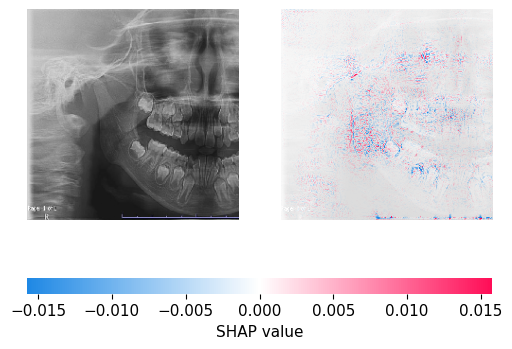

In [59]:
shap_values_V69_7Y_F = explainer_layer1.shap_values(background_test_array[[0]])
%matplotlib inline
shap.image_plot(shap_values_V69_7Y_F, background_test_array[[0]])

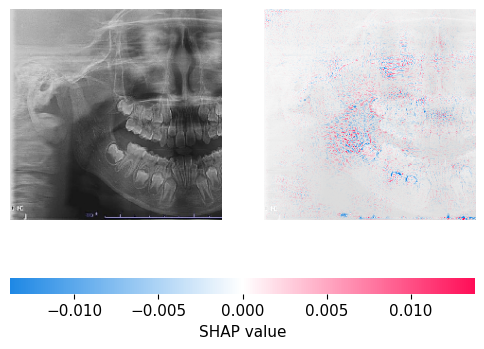

In [60]:
shap_values_FlipV69_7Y_F = explainer_layer1.shap_values(background_test_array[[1]])
%matplotlib inline
shap.image_plot(shap_values_FlipV69_7Y_F, background_test_array[[1]])

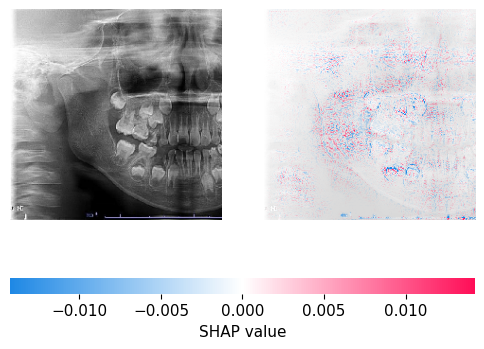

In [61]:
shap_values_FlipV70_7Y_F = explainer_layer1.shap_values(background_test_array[[2]])
%matplotlib inline
shap.image_plot(shap_values_FlipV70_7Y_F, background_test_array[[2]])

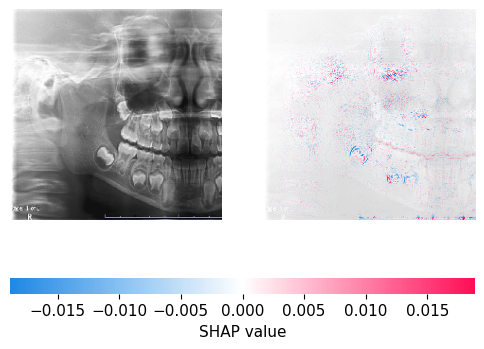

In [62]:
shap_values_VV85_7Y_M = explainer_layer1.shap_values(background_test_array[[18]])
%matplotlib inline
shap.image_plot(shap_values_VV85_7Y_M, background_test_array[[18]])

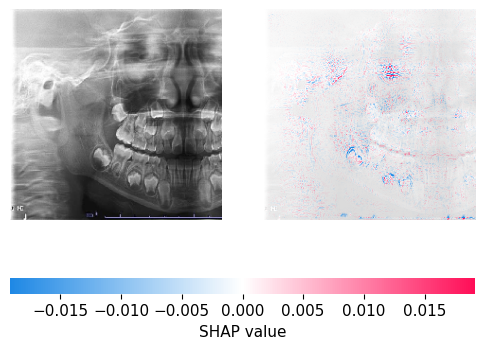

In [63]:
shap_values_FlipVV85_7Y_M = explainer_layer1.shap_values(background_test_array[[19]])
%matplotlib inline
shap.image_plot(shap_values_FlipVV85_7Y_M, background_test_array[[19]])

#### convert shap value from RGB to grayscale image

In [64]:
type(shap_values_VV85_7Y_M)

list

#### V69_7Y_F

In [65]:
#V69_7Y_F
data= [np.array(shap_values_V69_7Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [66]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

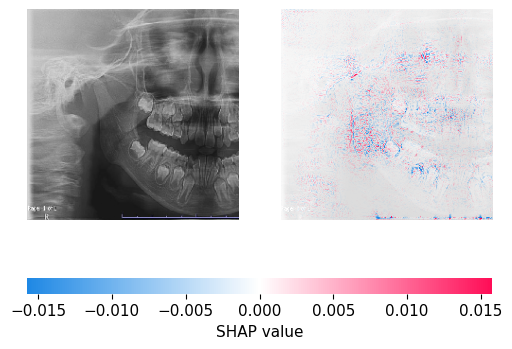

In [67]:
shap.image_plot(shap_values_V69_7Y_F, background_test_array[[0]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

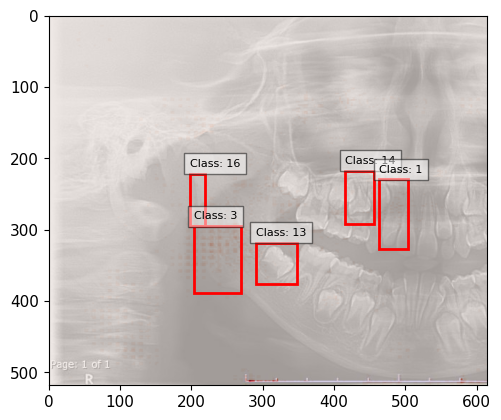

In [79]:
selected_bboxes_V69_7Y_F_pos = plot_bboxes_on_image_pos(Image_V69_7Y_F_path, df_V69_7Y_F_filtered_nms, grayscale_pos_thresholded, "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Images/pos_image.png")
%matplotlib inline


In [ ]:
pd.DataFrame(selected_bboxes_V69_7Y_F_pos)

xmin        ymin        xmax        ymax  confidence  class  \
0  290.441043  318.575748  347.501520  375.691668    0.949560     13   
1  203.511005  295.167556  268.920413  389.243506    0.901955      3   
2  197.709316  221.778303  218.693832  295.307760    0.808702     16   

                        name  iou  
0         Lower Second Molar  1.0  
1           Mandibular angle  1.0  
2  Posterior border of Ramus  1.0

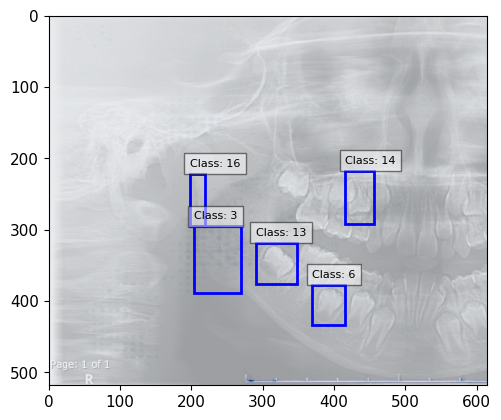

In [ ]:
selected_bboxes_V69_7Y_F_neg = plot_bboxes_on_image_neg(Image_V69_7Y_F_path, df_V69_7Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_V69_7Y_F_neg)

xmin        ymin        xmax        ymax  confidence  class  \
0  290.441043  318.575748  347.501520  375.691668    0.949560     13   
1  369.278275  377.189208  415.869944  432.946866    0.921958      6   
2  203.511005  295.167556  268.920413  389.243506    0.901955      3   
3  415.481574  217.678554  455.198303  291.415601    0.888440     14   
4  197.709316  221.778303  218.693832  295.307760    0.808702     16   

                        name  iou  
0         Lower Second Molar  1.0  
1      Lower Second Premolar  1.0  
2           Mandibular angle  1.0  
3       Upper First Premolar  1.0  
4  Posterior border of Ramus  1.0

#### FlipV69_7Y_F

In [ ]:
#FlipV69_7Y_F
data= [np.array(shap_values_FlipV69_7Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

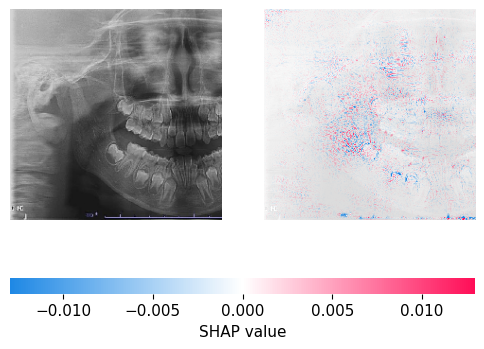

In [ ]:
shap.image_plot(shap_values_FlipV69_7Y_F, background_test_array[[1]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

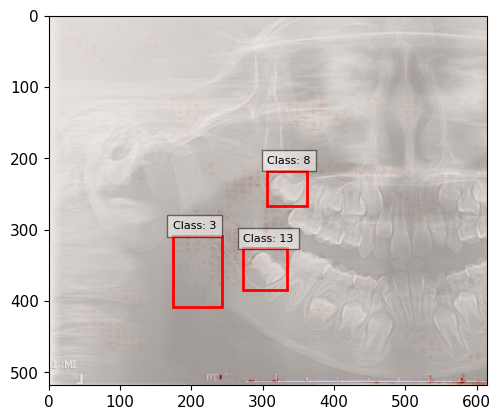

In [ ]:
selected_bboxes_FlipV69_7Y_F_pos = plot_bboxes_on_image_pos(Image_FlipV69_7Y_F_path, df_FlipV69_7Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipV69_7Y_F_pos)

xmin        ymin        xmax        ymax  confidence  class  \
0  272.698786  326.283959  334.644905  384.783243    0.948097     13   
1  306.334113  217.378926  362.162306  267.184029    0.918788      8   
2  173.991753  308.951112  242.764686  407.734420    0.896737      3   

                 name  iou  
0  Lower Second Molar  1.0  
1  Upper Second Molar  1.0  
2    Mandibular angle  1.0

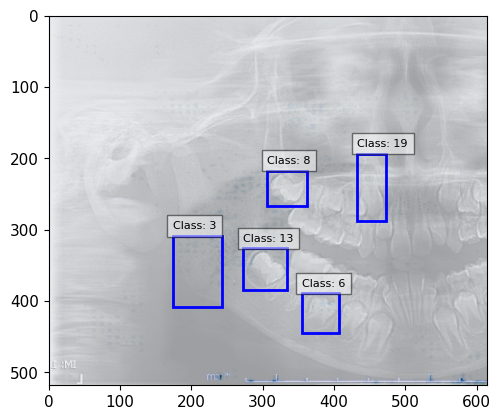

In [ ]:
selected_bboxes_FlipV69_7Y_F_neg = plot_bboxes_on_image_neg(Image_FlipV69_7Y_F_path, df_FlipV69_7Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipV69_7Y_F_neg)

xmin        ymin        xmax        ymax  confidence  class  \
0  272.698786  326.283959  334.644905  384.783243    0.948097     13   
1  354.402115  389.197378  406.943838  444.047954    0.934295      6   
2  306.334113  217.378926  362.162306  267.184029    0.918788      8   
3  173.991753  308.951112  242.764686  407.734420    0.896737      3   
4  432.724406  193.263198  472.651422  287.645275    0.890207     19   

                    name  iou  
0     Lower Second Molar  1.0  
1  Lower Second Premolar  1.0  
2     Upper Second Molar  1.0  
3       Mandibular angle  1.0  
4           Upper Canine  1.0

#### FlipV70_7Y_F

In [ ]:
#FlipV70_7Y_F
data= [np.array(shap_values_FlipV70_7Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

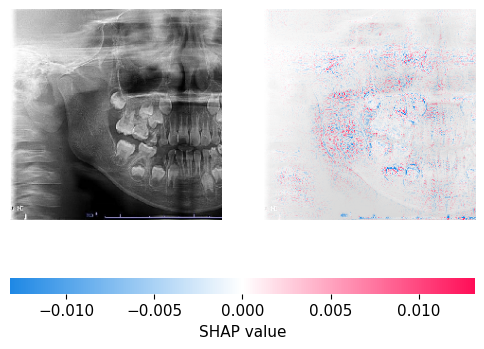

In [ ]:
shap.image_plot(shap_values_FlipV70_7Y_F, background_test_array[[2]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

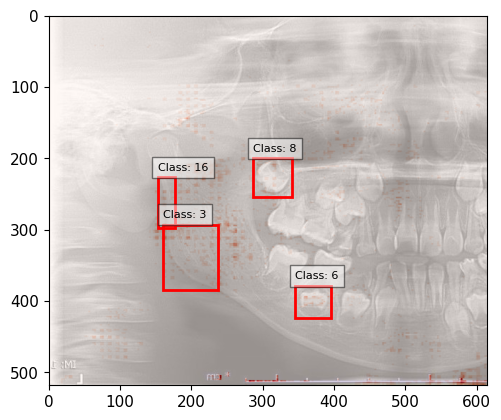

In [ ]:
selected_bboxes_FlipV70_7Y_F_pos = plot_bboxes_on_image_pos(Image_FlipV70_7Y_F_path, df_FlipV70_7Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipV70_7Y_F_pos)

xmin        ymin        xmax        ymax  confidence  class  \
0  345.671255  379.042400  395.689048  423.702582    0.916598      6   
1  286.679175  200.022027  341.269154  253.774572    0.914341      8   
2  160.386651  293.247458  236.824257  384.865927    0.890333      3   
3  152.949522  226.535678  176.447227  297.256264    0.826957     16   

                        name  iou  
0      Lower Second Premolar  1.0  
1         Upper Second Molar  1.0  
2           Mandibular angle  1.0  
3  Posterior border of Ramus  1.0

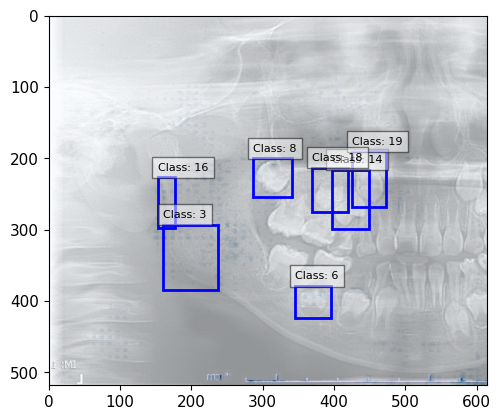

In [ ]:
selected_bboxes_FlipV70_7Y_F_neg = plot_bboxes_on_image_neg(Image_FlipV70_7Y_F_path, df_FlipV70_7Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipV70_7Y_F_neg)

xmin        ymin        xmax        ymax  confidence  class  \
0  345.671255  379.042400  395.689048  423.702582    0.916598      6   
1  286.679175  200.022027  341.269154  253.774572    0.914341      8   
2  396.463373  215.796016  448.814131  298.756150    0.910480     14   
3  425.567777  190.220955  473.313027  267.684547    0.896498     19   
4  160.386651  293.247458  236.824257  384.865927    0.890333      3   
5  369.301954  212.987499  419.544967  275.271882    0.888187     18   
6  152.949522  226.535678  176.447227  297.256264    0.826957     16   

                        name  iou  
0      Lower Second Premolar  1.0  
1         Upper Second Molar  1.0  
2       Upper First Premolar  1.0  
3               Upper Canine  1.0  
4           Mandibular angle  1.0  
5      Upper Second Premolar  1.0  
6  Posterior border of Ramus  1.0

#### VV85_7Y_M

In [ ]:
#VV85_7Y_M
data= [np.array(shap_values_VV85_7Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

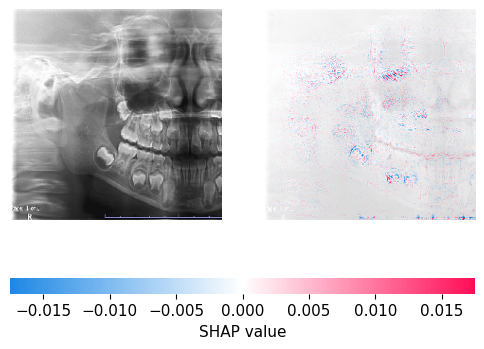

In [ ]:
shap.image_plot(shap_values_VV85_7Y_M, background_test_array[[18]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

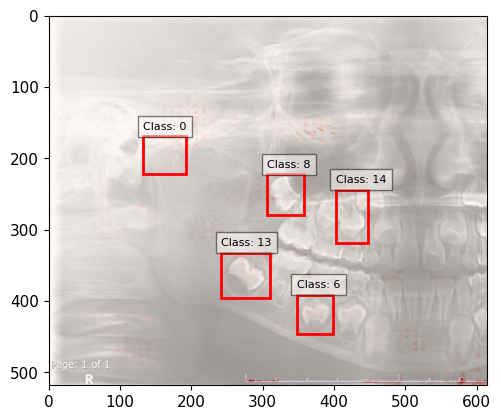

In [ ]:
selected_bboxes_VV85_7Y_M_pos = plot_bboxes_on_image_pos(Image_VV85_7Y_M_path, df_VV85_7Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_VV85_7Y_M_pos)

xmin        ymin        xmax        ymax  confidence  class  \
0  242.071352  332.193103  309.532200  395.292082    0.927893     13   
1  347.964585  391.438115  398.115666  446.633258    0.918505      6   
2  306.333747  222.574219  358.414967  278.899441    0.903327      8   
3  401.972357  244.288597  447.118068  318.690943    0.883407     14   
4  132.365297  169.298557  193.013870  221.200427    0.862862      0   

                    name  iou  
0     Lower Second Molar  1.0  
1  Lower Second Premolar  1.0  
2     Upper Second Molar  1.0  
3   Upper First Premolar  1.0  
4                Condyle  1.0

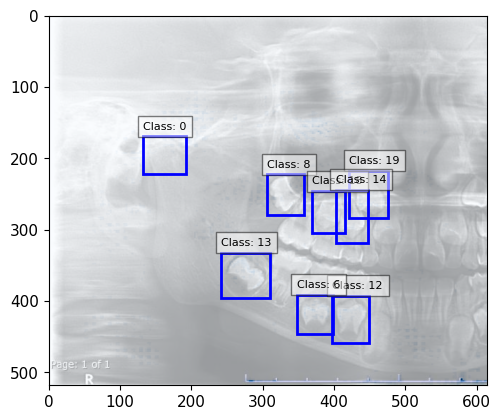

In [ ]:
selected_bboxes_VV85_7Y_M_neg = plot_bboxes_on_image_neg(Image_VV85_7Y_M_path, df_VV85_7Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_VV85_7Y_M_neg)

xmin        ymin        xmax        ymax  confidence  class  \
0  397.653076  392.299287  449.521447  458.949563    0.930489     12   
1  420.957731  217.097421  475.436619  284.053254    0.928607     19   
2  242.071352  332.193103  309.532200  395.292082    0.927893     13   
3  347.964585  391.438115  398.115666  446.633258    0.918505      6   
4  306.333747  222.574219  358.414967  278.899441    0.903327      8   
5  369.301295  246.014290  415.838397  304.596103    0.893503     18   
6  401.972357  244.288597  447.118068  318.690943    0.883407     14   
7  132.365297  169.298557  193.013870  221.200427    0.862862      0   

                    name  iou  
0   Lower First Premolar  1.0  
1           Upper Canine  1.0  
2     Lower Second Molar  1.0  
3  Lower Second Premolar  1.0  
4     Upper Second Molar  1.0  
5  Upper Second Premolar  1.0  
6   Upper First Premolar  1.0  
7                Condyle  1.0

#### FlipVV85_7Y_M

In [ ]:
#FlipVV85_7Y_M
data= [np.array(shap_values_FlipVV85_7Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

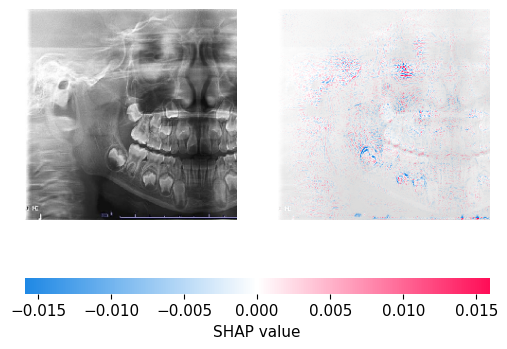

In [ ]:
shap.image_plot(shap_values_FlipVV85_7Y_M, background_test_array[[19]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

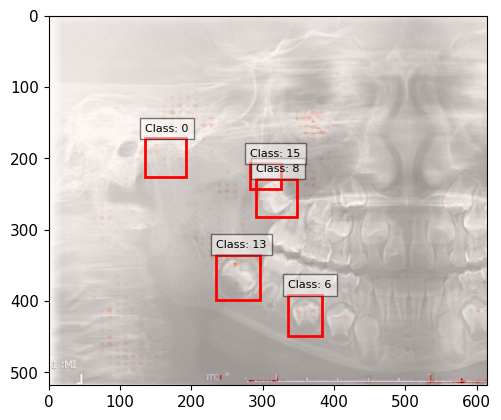

In [ ]:
selected_bboxes_FlipVV85_7Y_M_pos = plot_bboxes_on_image_pos(Image_FlipVV85_7Y_M_path, df_FlipVV85_7Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipVV85_7Y_M_pos)

xmin        ymin        xmax        ymax  confidence  class  \
0  234.558027  335.396683  296.791197  398.208647    0.947646     13   
1  290.618338  228.791050  347.855855  282.153842    0.943234      8   
2  335.715302  391.619229  383.579896  449.522066    0.910473      6   
3  135.384479  172.097194  192.811597  226.236281    0.867973      0   
4  282.638820  207.103611  325.708149  242.747662    0.604832     15   

                    name  iou  
0     Lower Second Molar  1.0  
1     Upper Second Molar  1.0  
2  Lower Second Premolar  1.0  
3                Condyle  1.0  
4      Upper Third Molar  1.0

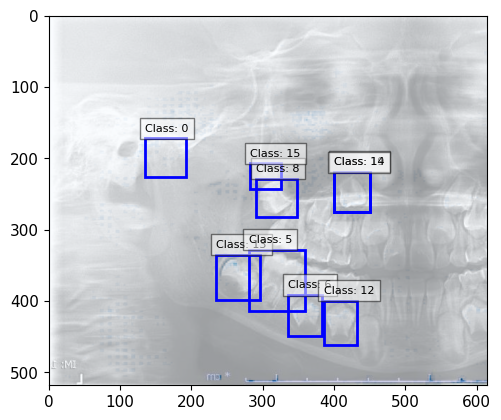

In [ ]:
selected_bboxes_FlipVV85_7Y_M_neg = plot_bboxes_on_image_neg(Image_FlipVV85_7Y_M_path, df_FlipVV85_7Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipVV85_7Y_M_neg)

xmin        ymin        xmax        ymax  confidence  class  \
0  234.558027  335.396683  296.791197  398.208647    0.947646     13   
1  280.022208  327.792275  359.737372  414.164058    0.943842      5   
2  290.618338  228.791050  347.855855  282.153842    0.943234      8   
3  335.715302  391.619229  383.579896  449.522066    0.910473      6   
4  399.958045  218.678741  450.471621  274.975881    0.879686     19   
5  385.520612  399.636131  432.402057  462.194238    0.879563     12   
6  399.270455  219.425195  450.094743  275.183548    0.489607     14   
7  135.384479  172.097194  192.811597  226.236281    0.867973      0   
8  282.638820  207.103611  325.708149  242.747662    0.604832     15   

                    name       iou  
0     Lower Second Molar  1.000000  
1      Lower First Molar  1.000000  
2     Upper Second Molar  1.000000  
3  Lower Second Premolar  1.000000  
4           Upper Canine  1.000000  
5   Lower First Premolar  1.000000  
6   Upper First Premolar  0.835033  
7                Condyle  1.000000  
8      Upper Third Molar  1.000000